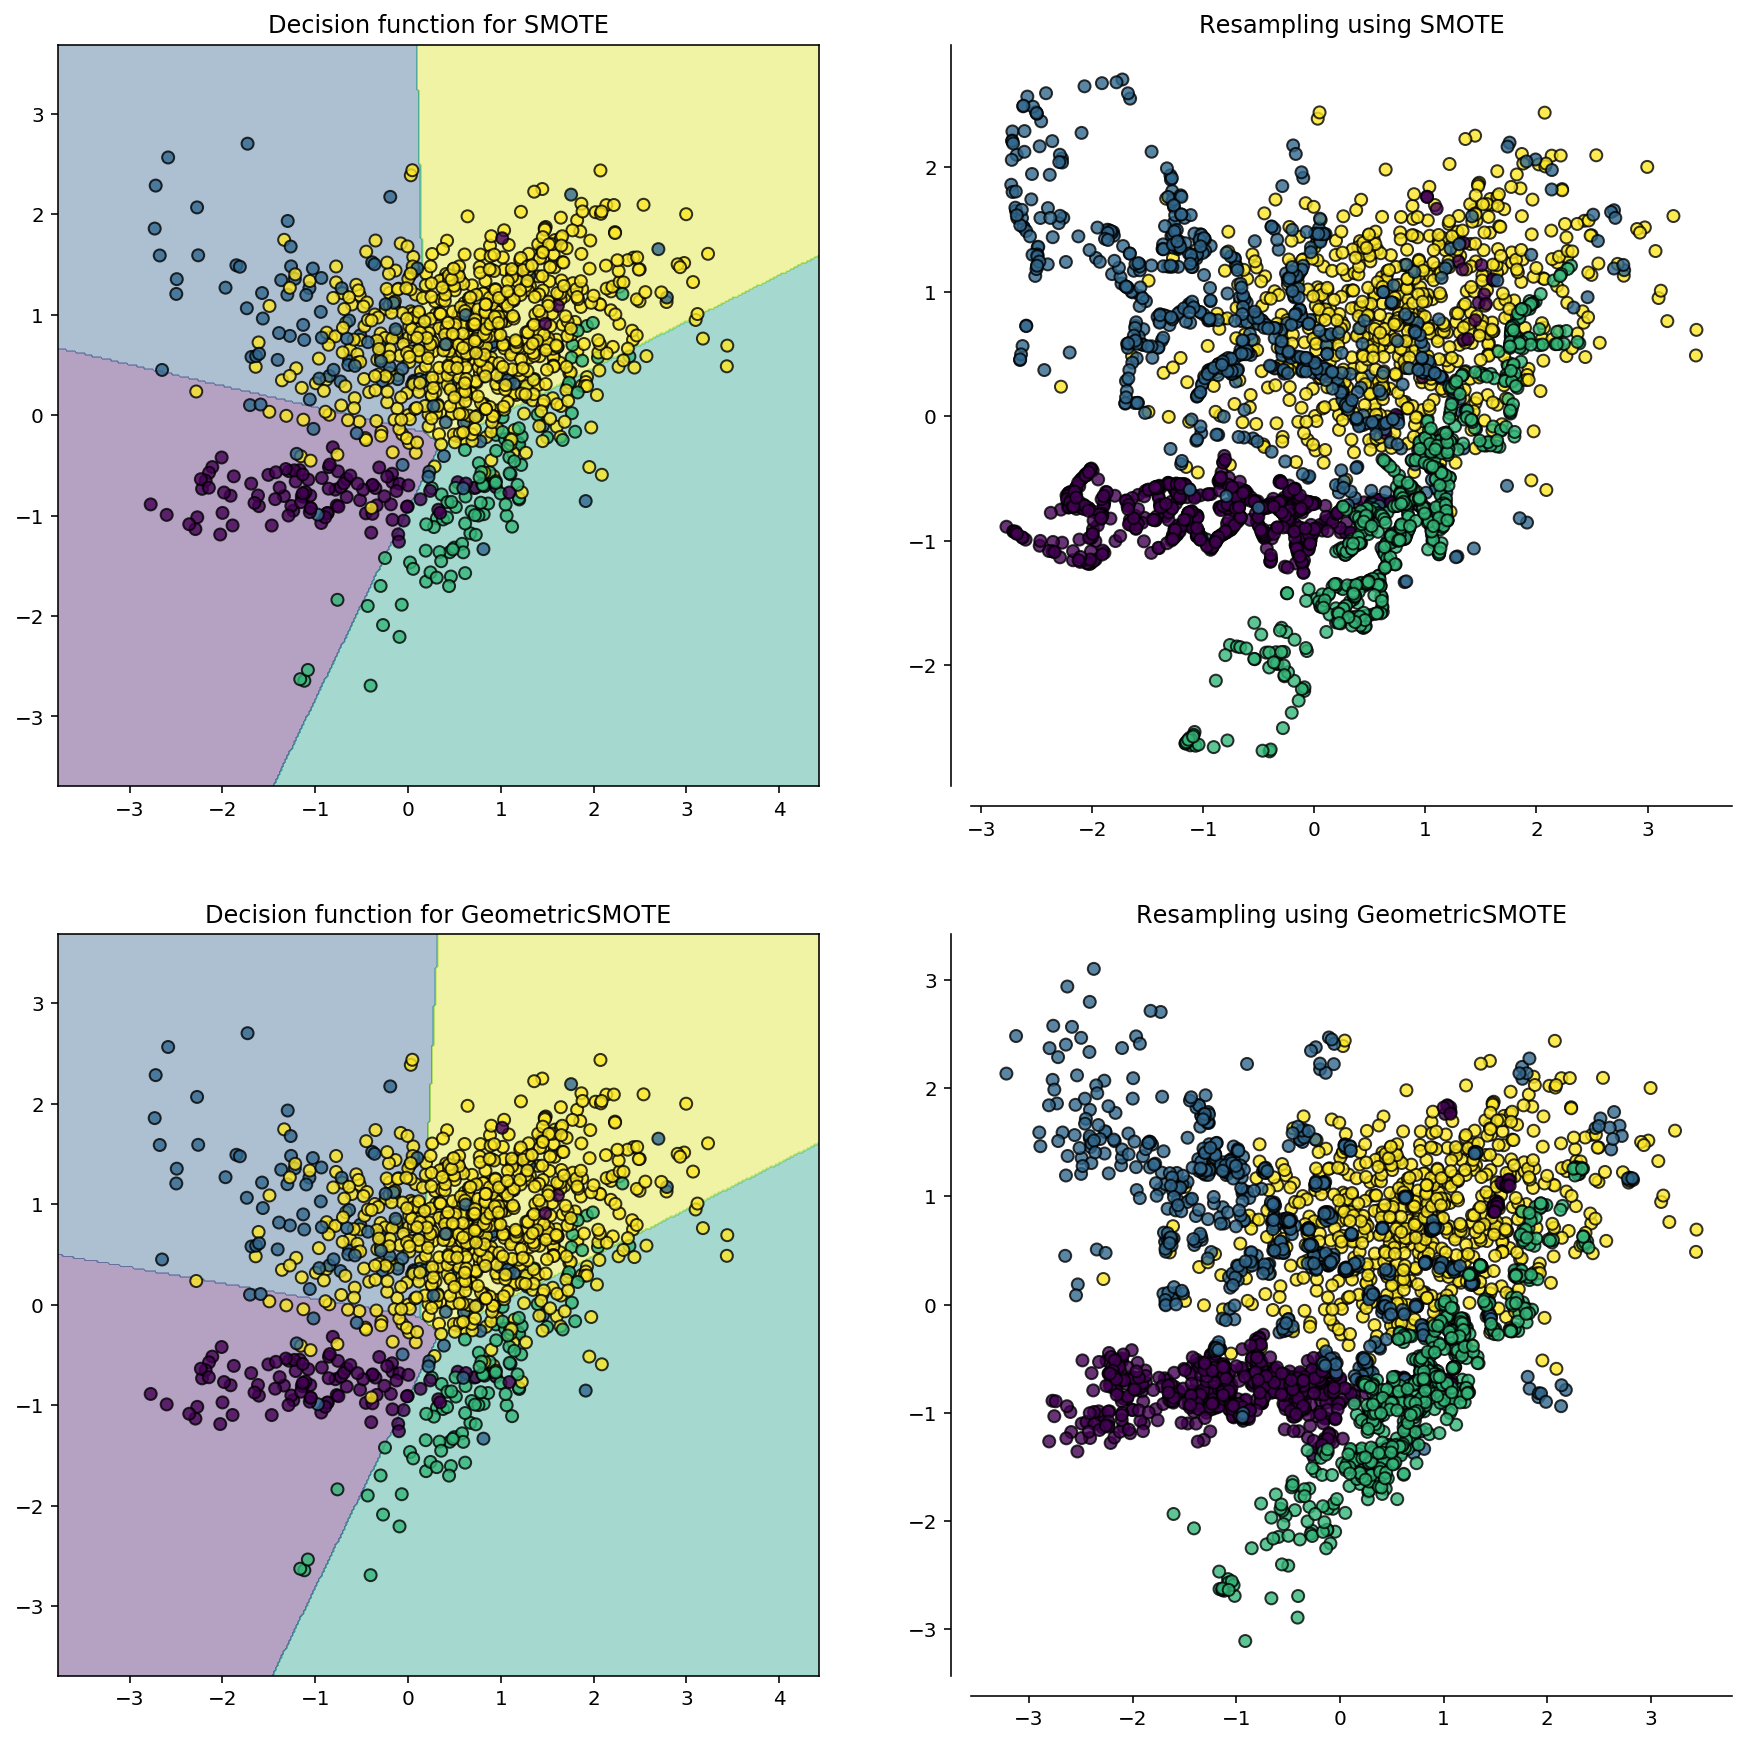

In [12]:
# https://imbalanced-learn.readthedocs.io/en/stable/auto_examples/combine/plot_comparison_combine.html#sphx-glr-auto-examples-combine-plot-comparison-combine-py


from collections import Counter
from imblearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

# dataset generator
from sklearn.datasets import make_classification

# classifier and oversamplers
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from gsmote import GeometricSMOTE

%config InlineBackend.figure_format = 'retina'



def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98),
                   class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=len(weights),
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)


def plot_resampling(X, y, sampler, ax):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)


def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15, 15))

X, y = create_dataset(n_samples=1000, weights=(0.1, 0.1, 0.1, 0.7))

ax_arr = ((ax1, ax2), (ax3, ax4))
for ax, sampler in zip(ax_arr, (
        SMOTE(random_state=None),
        GeometricSMOTE(random_state=None),
        )):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))

#fig.tight_layout()
plt.show()
